# Mushroom classification deadly or yummy
Explain  the main objective of the project.

## Import Libraries

In [79]:
import pandas as pd
import seaborn as sea
from sklearn import tree
import numpy as np
import graphviz 

from sklearn.model_selection import cross_val_score, GridSearchCV

##Source data
you can find the information about data in at [checkout data](  https://datascienceplus.com/mushrooms-classification-part-1/) 
![](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-shape.jpg)

https://www.kaggle.com/uciml/mushroom-classification




### Let's visualize the data .
We're looking at correlations between the `class` value and other properties
use open refine to refine data 

Supervised learning 
quick draw 
https://quickdraw.withgoogle.com/

Unsupervised learning
find simialrity to find an answer or meaning ..
### freecodecamp chhuahua or muffin
### doodle maps yoga form fluens
### wired okcupid

Reinforcement: 
### google deep mind
### end goal and learn from it
### google deepmind learn to walk

In [48]:
df =  pd.read_csv('./data-sets/mushrooms_train.csv')

In [49]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4169,e,x,y,e,t,n,f,c,b,u,...,s,p,p,p,w,o,p,k,v,d
4170,p,f,s,n,f,s,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
4171,p,f,s,e,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,p
4172,e,x,y,b,t,n,f,c,b,w,...,s,e,e,p,w,t,e,w,c,w
4173,e,x,f,g,f,n,f,c,n,n,...,s,w,w,p,w,o,p,n,v,u


In [50]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,4174,4174,4174,4174,4174,4174,4174,4174,4174,4174,...,4174,4174,4174,4174,4174,4174,4174,4174,4174,4174
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,2137,1873,1667,1160,2444,1775,4070,3502,2890,870,...,2520,2274,2220,4174,4074,3866,2053,1191,2051,1629


# On Kaggle https://www.kaggle.com/mig555/mushroom-classification we see `odor` is a key predictor attribute to distinguish edible or poisonous.
# But we do not have odor for our image so we will remove odour attribute.

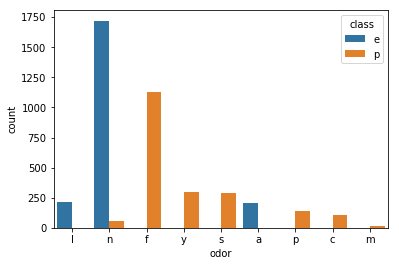

In [51]:
sea.countplot(x='odor' , hue='class', data=df)

Above shows odor is key predictor.

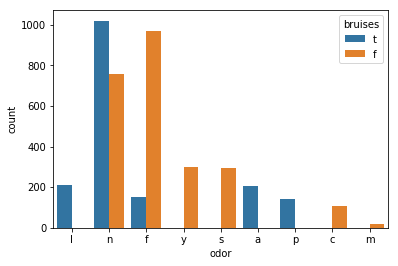

In [52]:
sea.countplot(x='odor' , hue='bruises', data=df)

# Grow a decision tree now. Building a model using sklearn
# google for the library 
### https://scikit-learn.org/stable/modules/tree.html

In [53]:
classes = df['class']   # edible  or poisonous.. result
#features = df.drop(['class', 'odor'], axis=1)   # attributes we dont need odor and class 

features = pd.get_dummies(df.drop(['class','odor','gill-attachment',
                                  'gill-spacing','stalk-shape','stalk-root','stalk-surface-above-ring',
                                 'stalk-surface-below-ring','population','gill-size','habitat','bruises','spore-print-color'],axis=1))




In order to build a decision tree the feature needs to be expressed as numbers , either 0 or 1. usinfg function as getdummies

In [54]:
features = pd.get_dummies(features)

In [55]:
features.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0


In [56]:
model = tree.DecisionTreeClassifier()

In [57]:
model.fit(features, classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
model.score(features, classes)

0.9777192141830379

Now lets test the model with test data ... 

In [59]:
df_test =  pd.read_csv('./data-sets/mushrooms_test.csv')

In [63]:
classes_test = df_test['class']   # edible  or poisonous.. result
#features_test = df_test.drop(['class', 'odor'], axis=1)   # attributes we dont need odor and class 

features_test = pd.get_dummies(df_test.drop(['class','odor','gill-attachment',
                                  'gill-spacing','stalk-shape','stalk-root','stalk-surface-above-ring',
                                 'stalk-surface-below-ring','population','gill-size','habitat','bruises','spore-print-color'],axis=1))

features_test = pd.get_dummies(features_test)



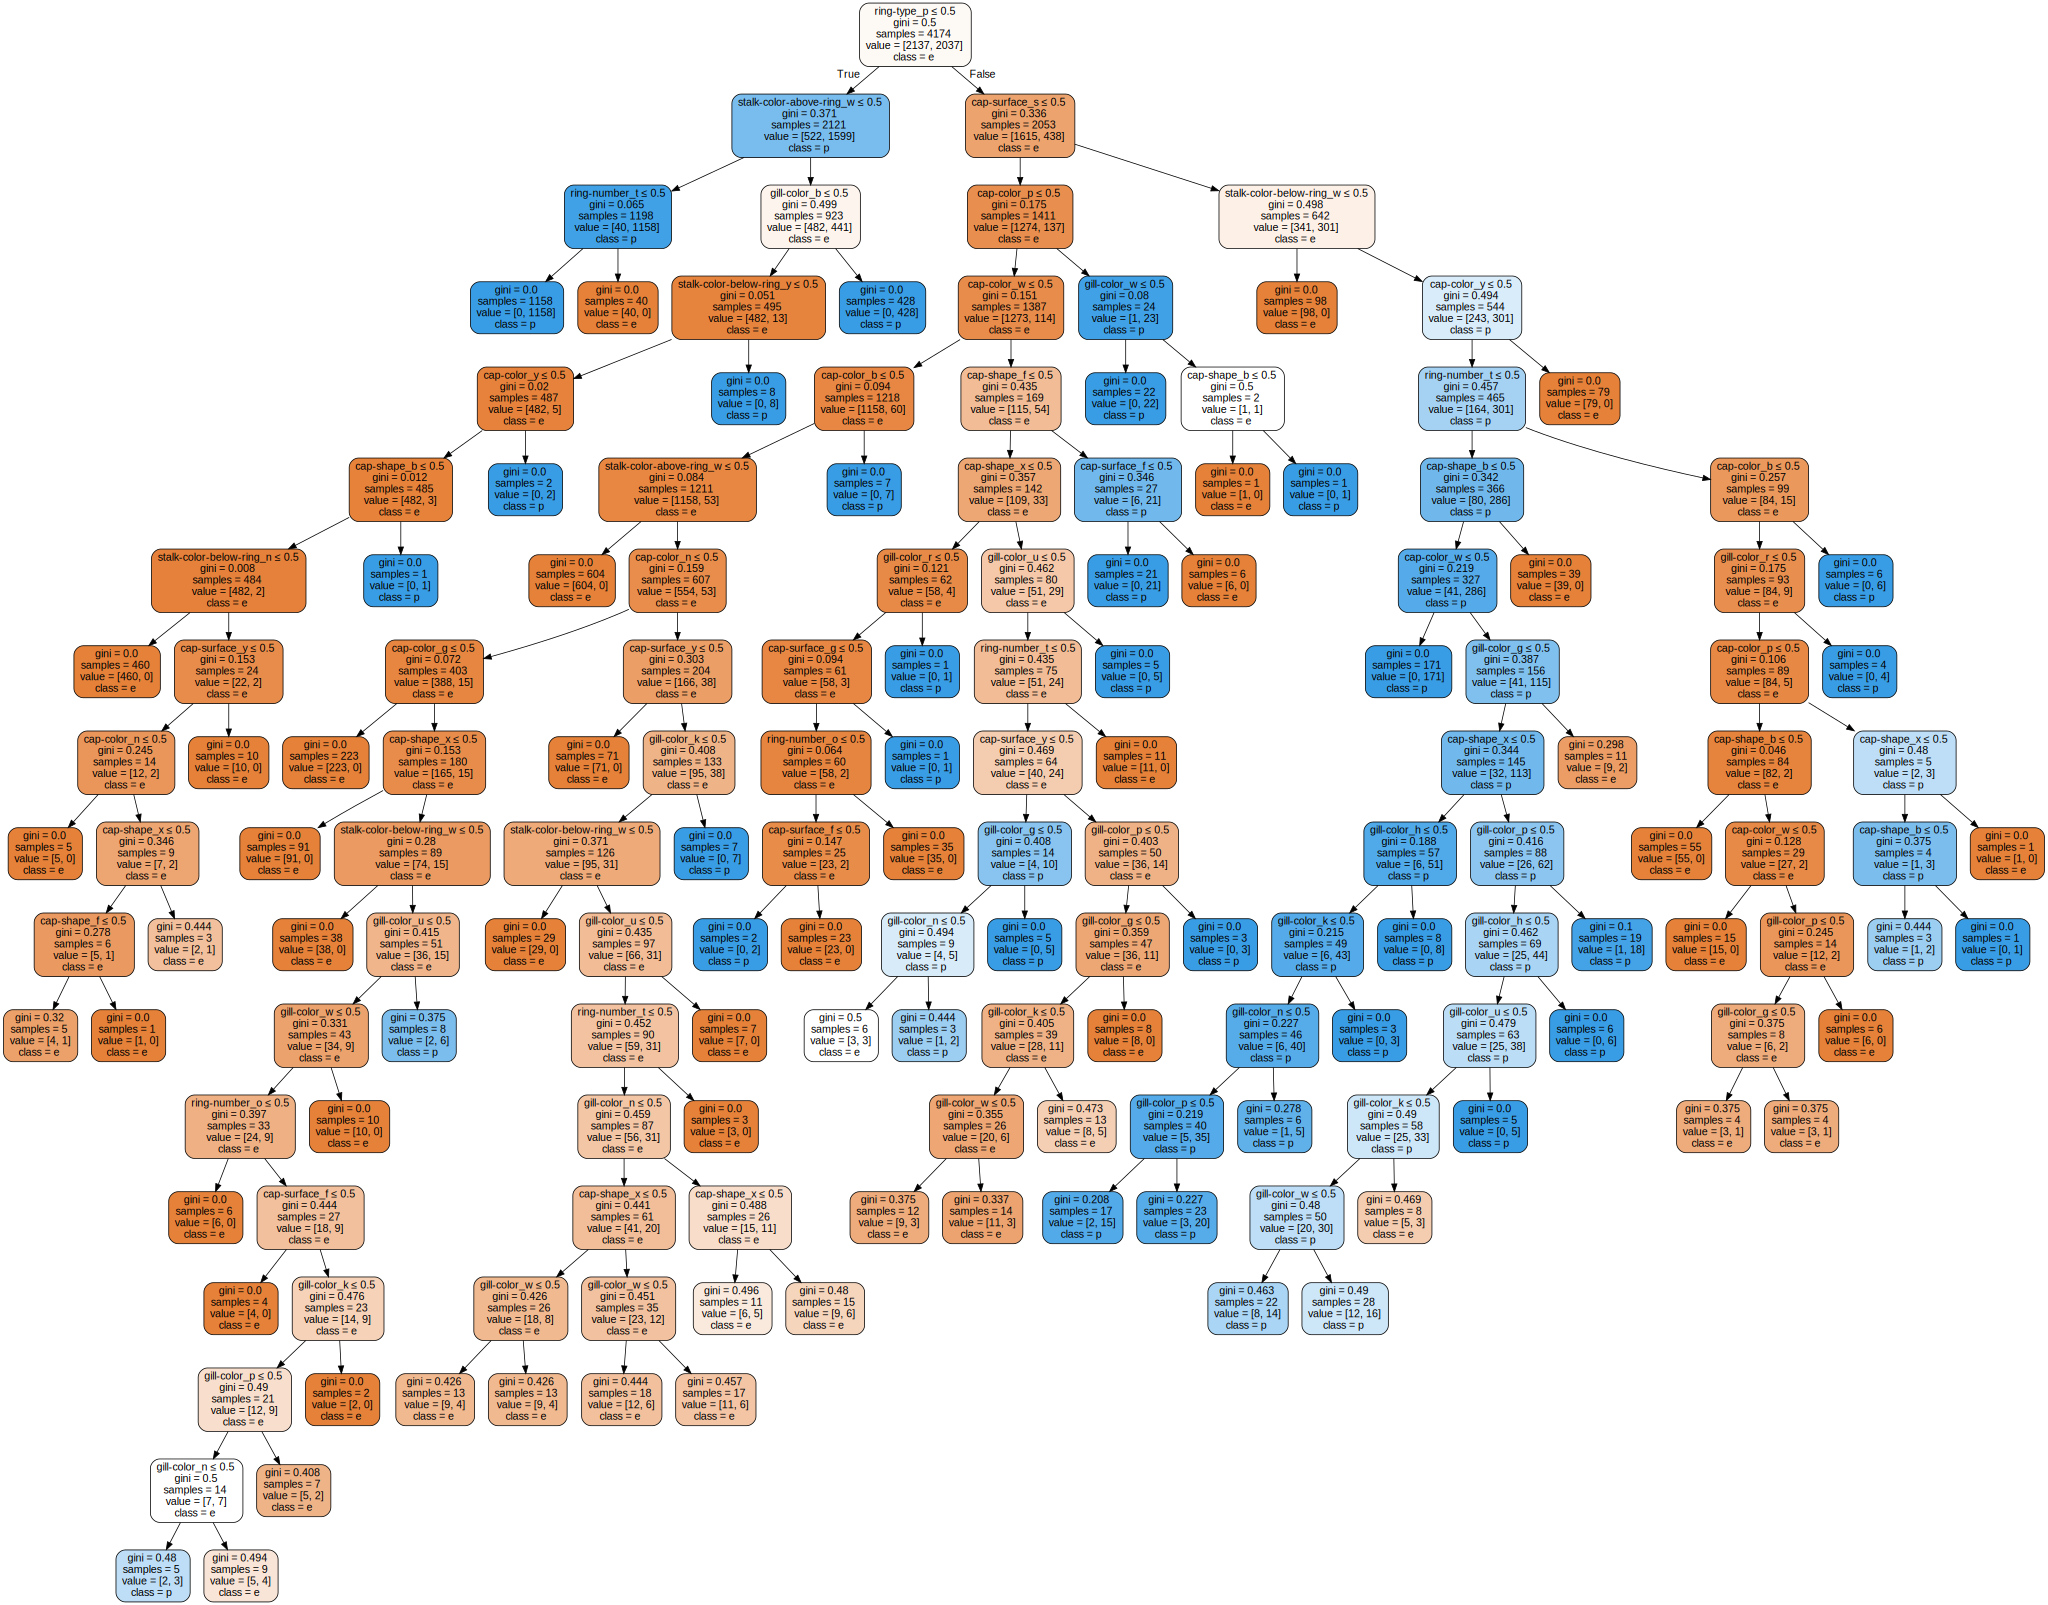

In [64]:
model = tree.DecisionTreeClassifier()
model.fit(features,classes)
plotTree()

In [65]:
model.score(features_test, classes_test)


0.9716455696202532

view the decision tree

In [66]:
# http://scikit-learn.org/stable/modules/tree.html#classification
def plotTree():
    dot_data = tree.export_graphviz(model, 
                                    out_file=None, 
                                    feature_names=features.columns,
                                    filled=True, 
                                    rounded=True,  
                                    class_names=model.classes_,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph 

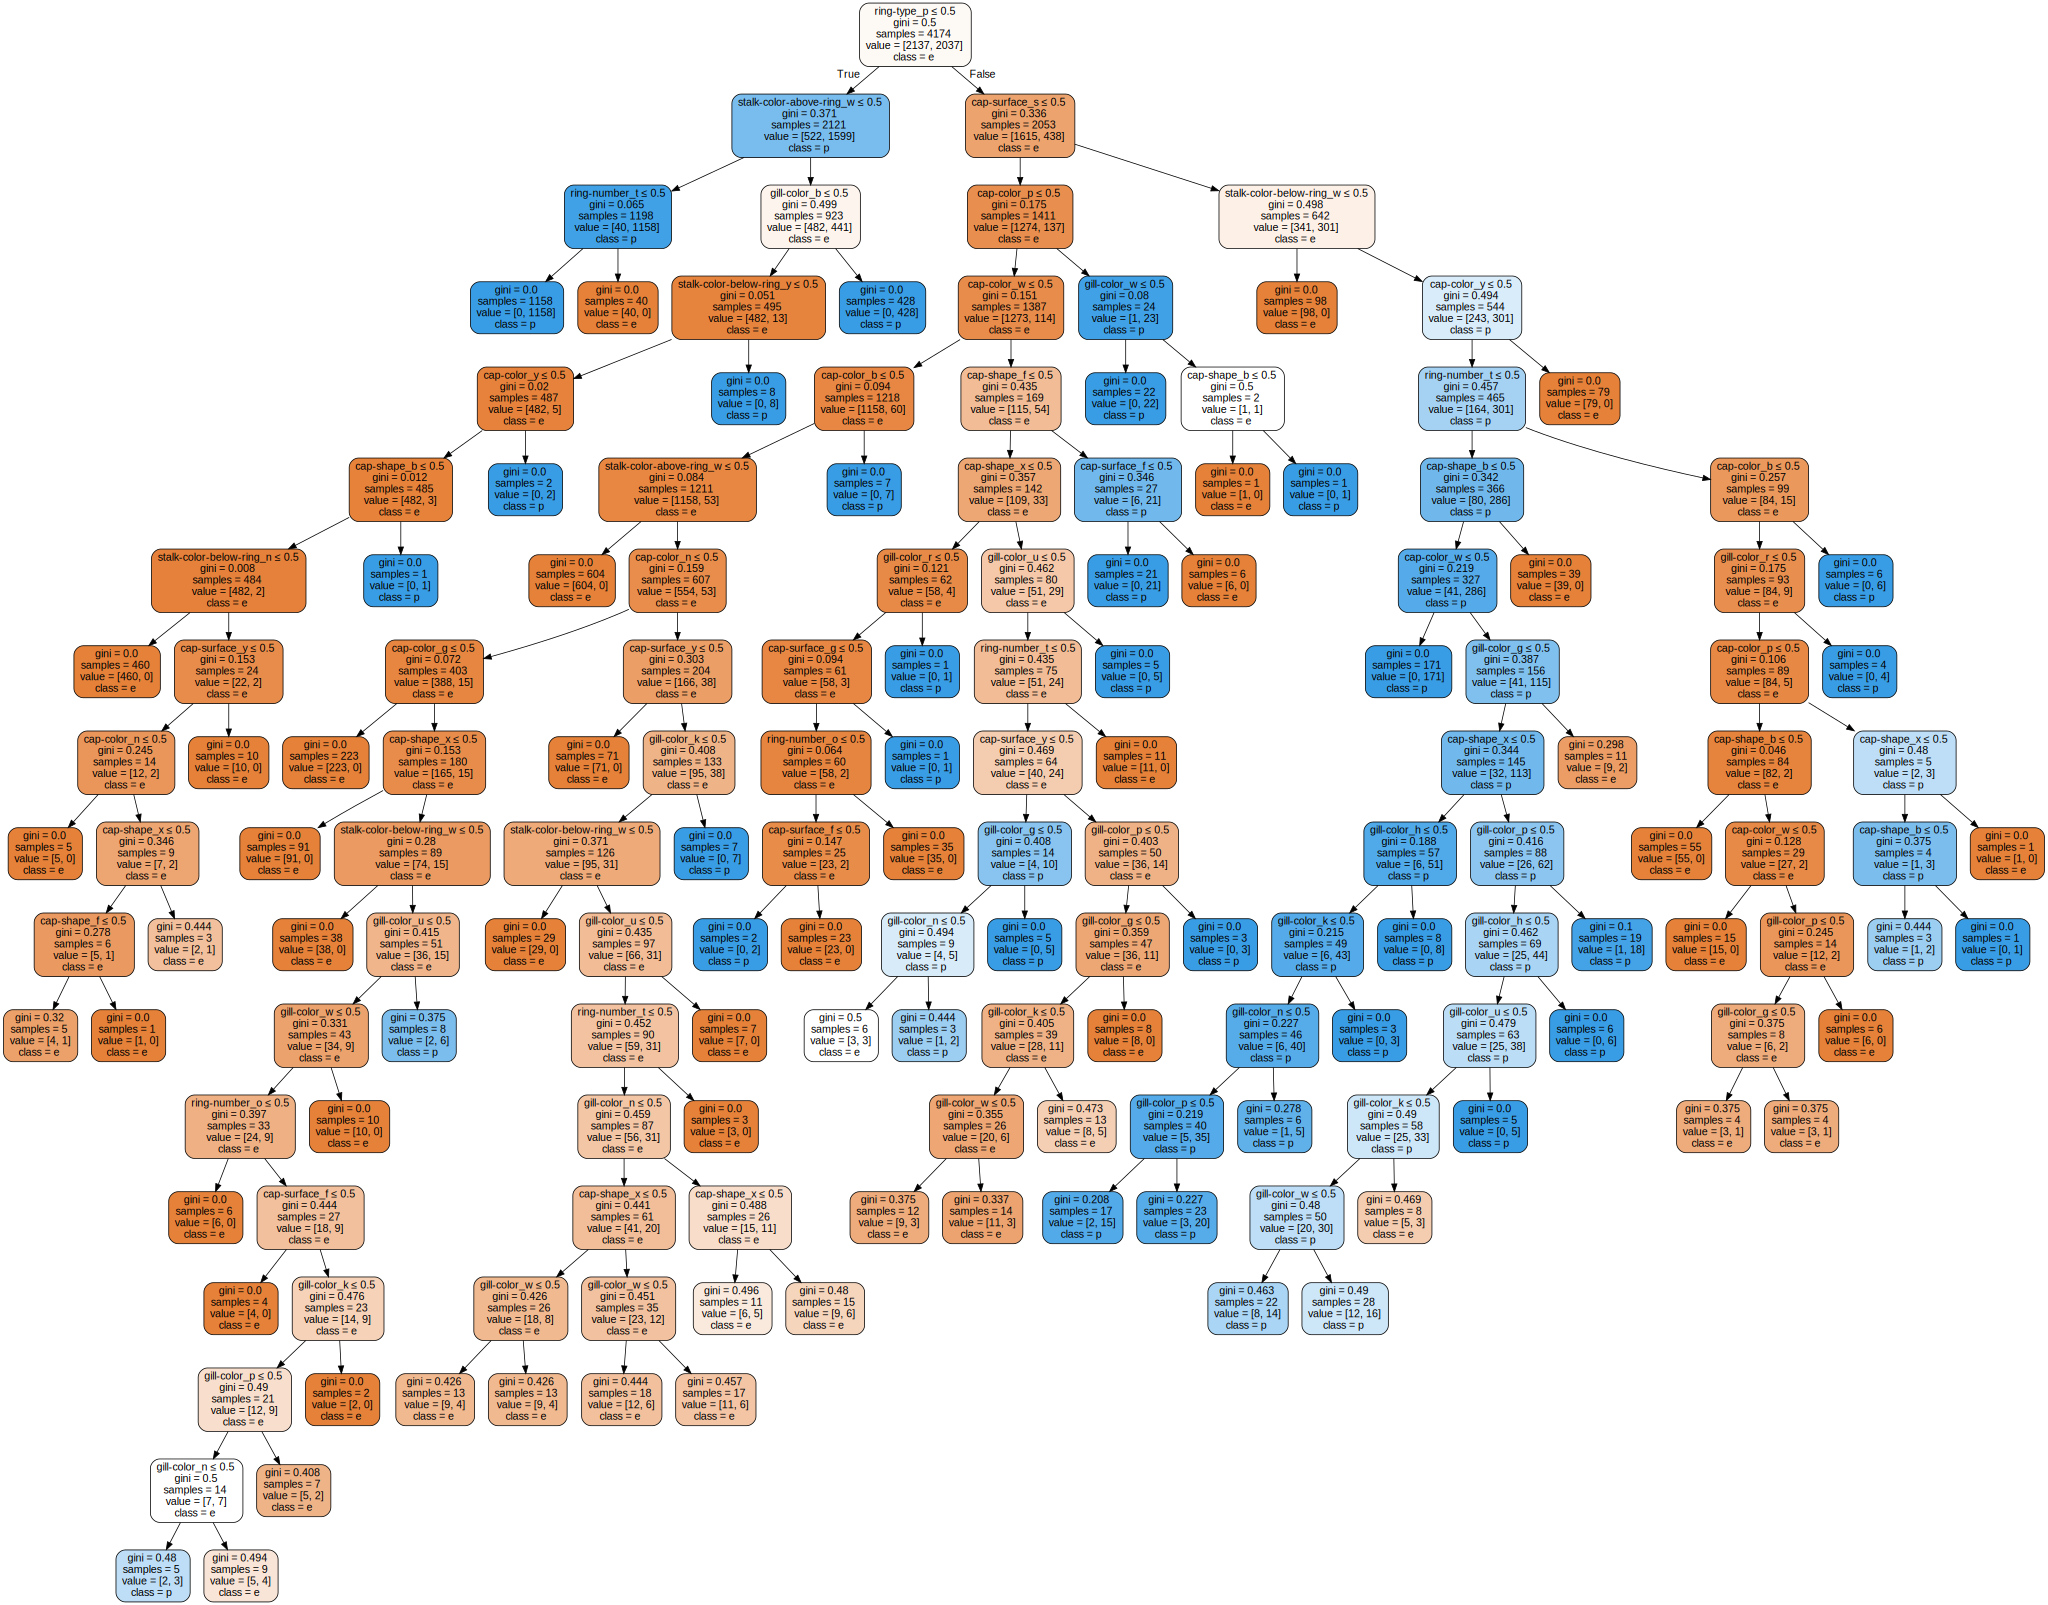

In [67]:
plotTree()

Set the tree depth to smaller value so that it doesnt overfit...

0.9056061332055583 {'max_depth': 3}


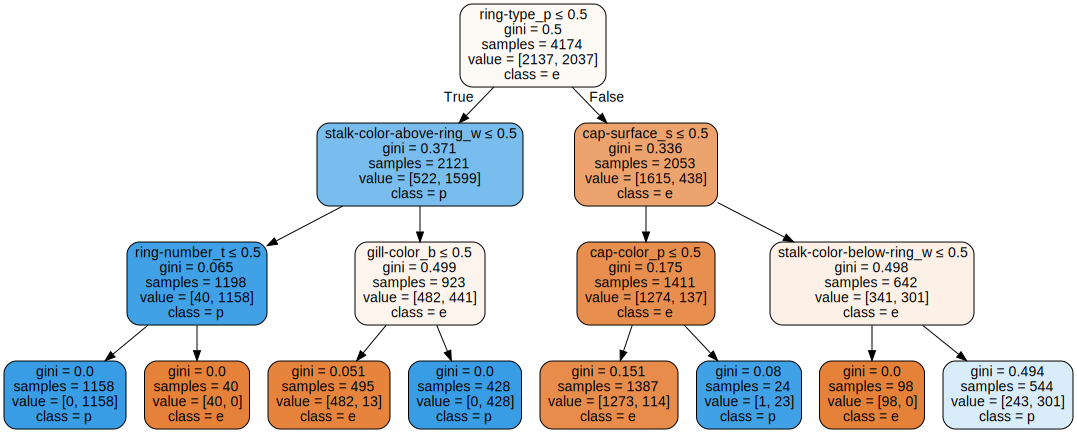

In [68]:

parameters = {'max_depth':range(2,4)}

modelSearch = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=10)

modelSearch.fit(features, classes)

tree_model = modelSearch.best_estimator_

print(modelSearch.best_score_, modelSearch.best_params_) 

model = tree.DecisionTreeClassifier(max_depth=modelSearch.best_params_["max_depth"])
model.fit(features,classes)
plotTree()

In [69]:
model.score(features_test,classes_test)

0.9106329113924051

In [70]:
model.score(features,classes)

0.9111164350742693

In [75]:
classes_result = model.predict(features_test)

In [76]:
classes_result

array(['e', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [84]:
np_array = np.array( classes_result )
df = pd.DataFrame(np_array)
df.to_csv("output.csv")

out of 3950 records 353 were wrongly predicted ...almost 91.06329% corect